In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Model selection and evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score




In [5]:
#import dataset

df = pd.read_csv('bank.xls')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Exploration

After we imported the dataset, we have to look at the total number of rows in the dataset and analyze the number of missing values.

In [7]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 11162 rows.


In [10]:
# Check the column names

print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


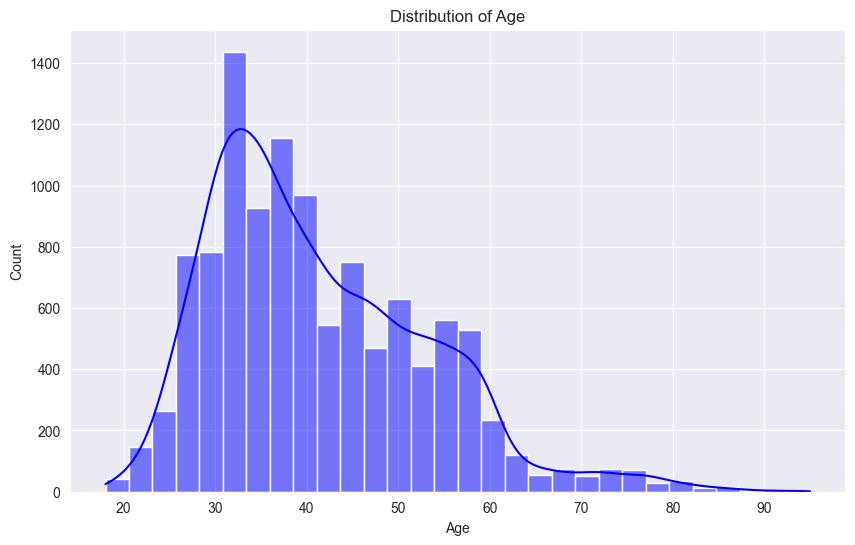

In [12]:
# Access the column (assuming the column name is 'age')

plt.figure(figsize=(10, 6))

sns.histplot(df['age'], bins=30, kde=True, color='blue')

plt.title('Distribution of Age')

plt.xlabel('Age')

plt.ylabel('Count')

plt.grid(True)

plt.show()

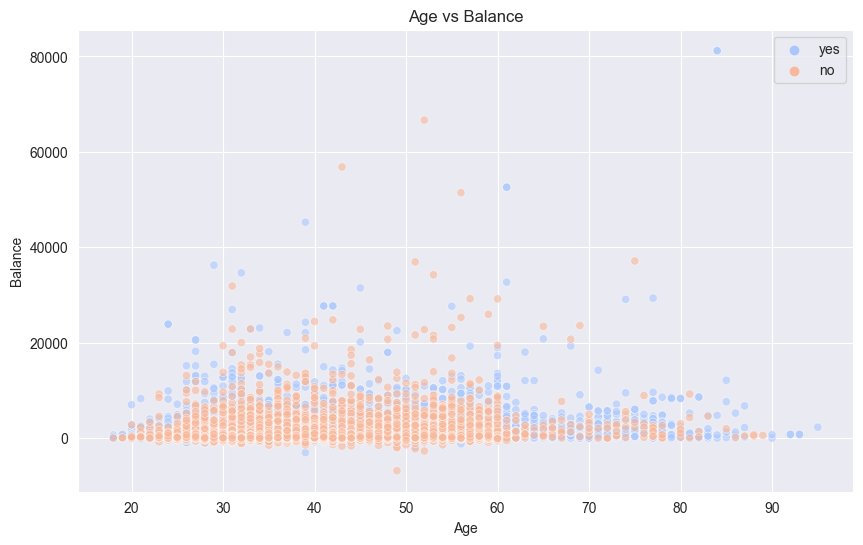

In [13]:

# Scatter plot of 'age' vs 'Balance'

plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='balance', data=df, hue='deposit', palette='coolwarm', alpha=0.6)

plt.title('Age vs Balance')

plt.xlabel('Age')

plt.ylabel('Balance')

plt.grid(True)

plt.legend()

plt.show()


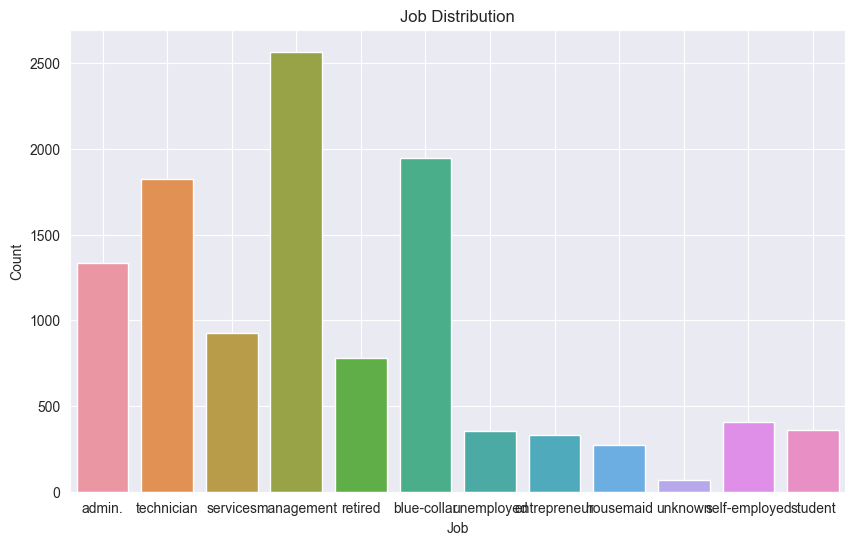

In [14]:

# Bar chart of 'Job' distribution

plt.figure(figsize=(10, 6))

sns.countplot(x='job', data=df)

plt.title('Job Distribution')

plt.xlabel('Job')

plt.ylabel('Count')

plt.grid(True)

plt.show()


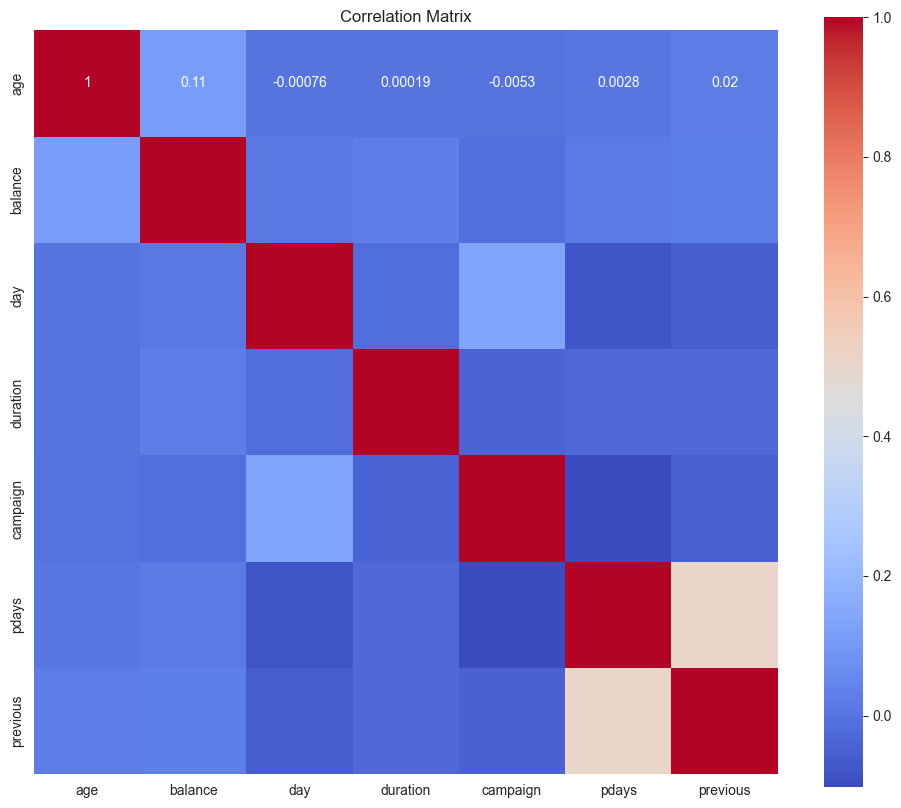

In [15]:

# Heatmap of correlation matrix

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Matrix')

plt.show()

In [16]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

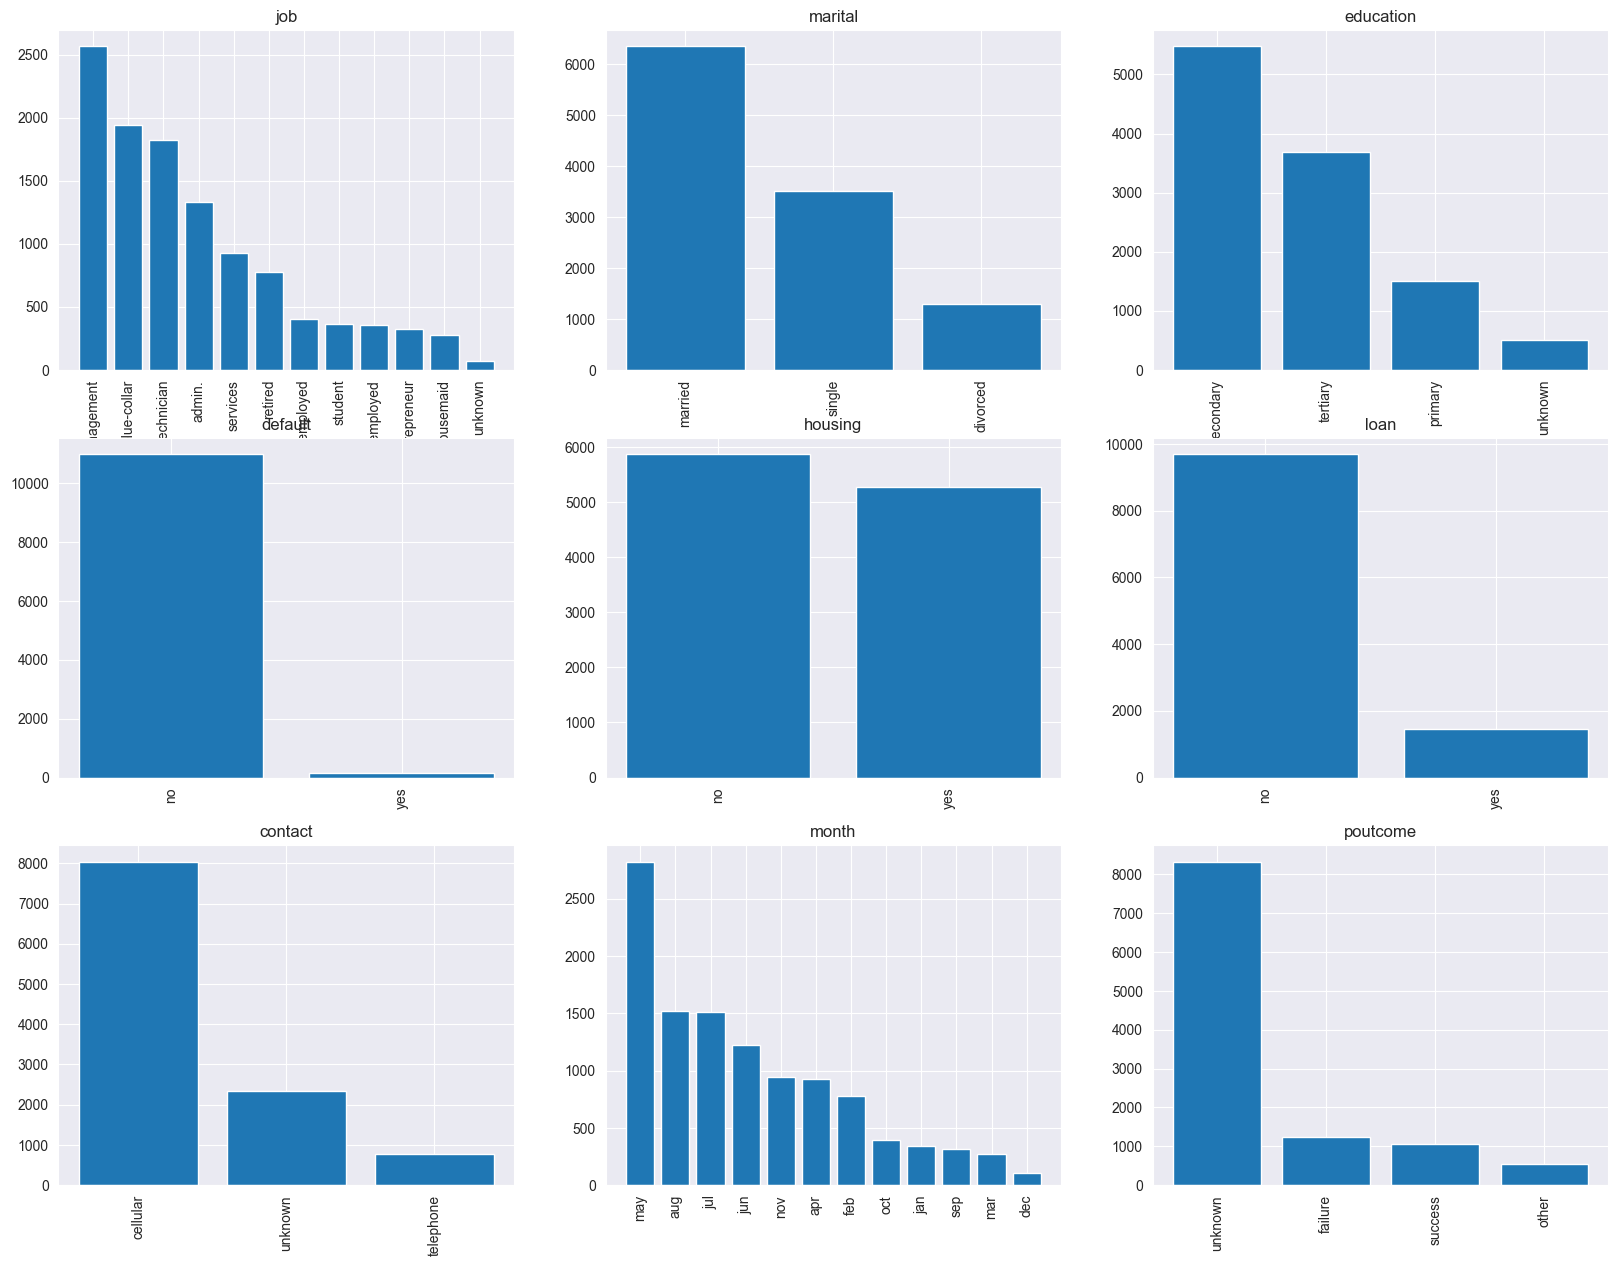

In [17]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

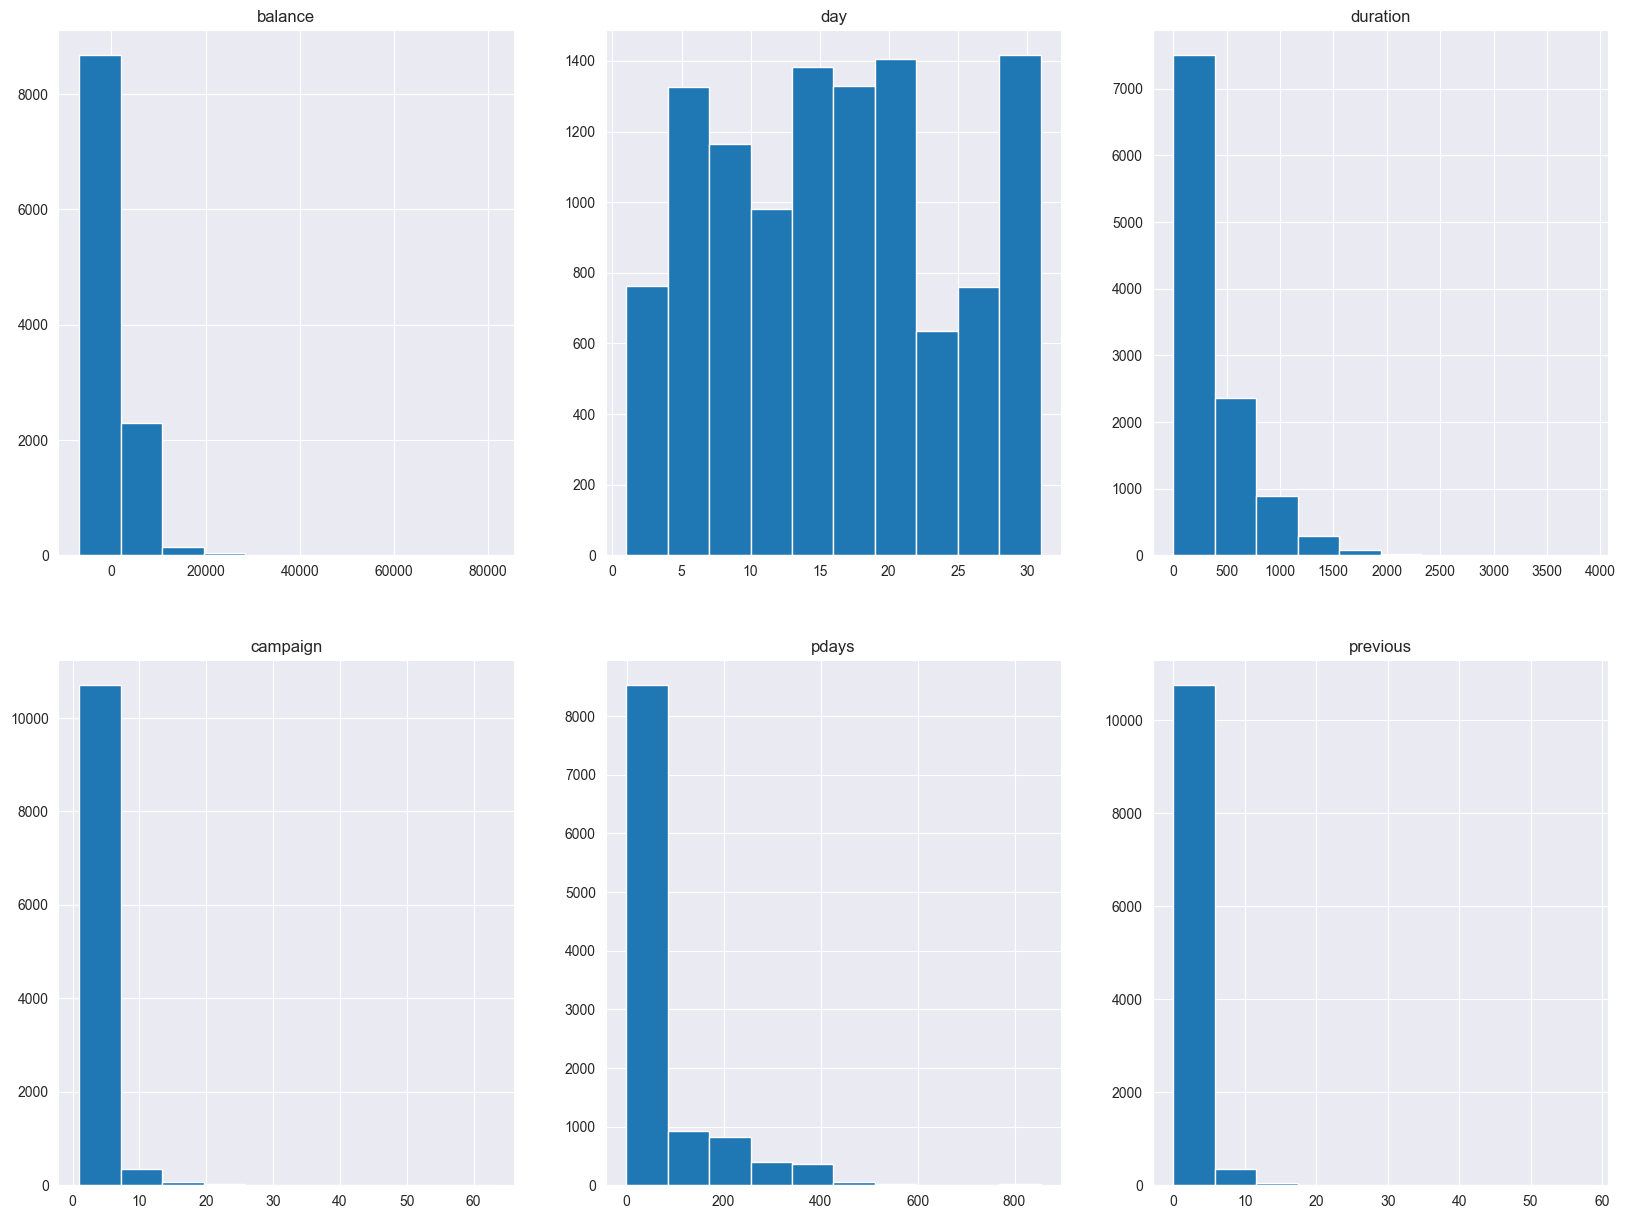

In [19]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [18]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


Percentage of 'pdays' values above 400:

In [20]:
len (df[df['pdays'] > 400] ) / len(df) * 100

1.2005017022039062

In [21]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.035835871707579285

In [22]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.04479483963447411

<Axes: title={'center': 'Deposit value counts'}>

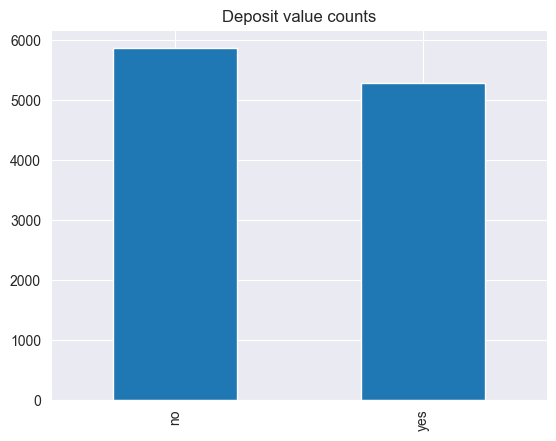

In [23]:
value_counts = df['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

On the diagram we see that counts for 'yes' and 'no' values for 'deposit' are close, so we can use accuracy as a metric for a model, which predicts the campaign outcome.

Let's see how 'deposit' column value varies depending on other categorical columns' values:

<Axes: title={'center': 'Job Distribution by Deposit'}>

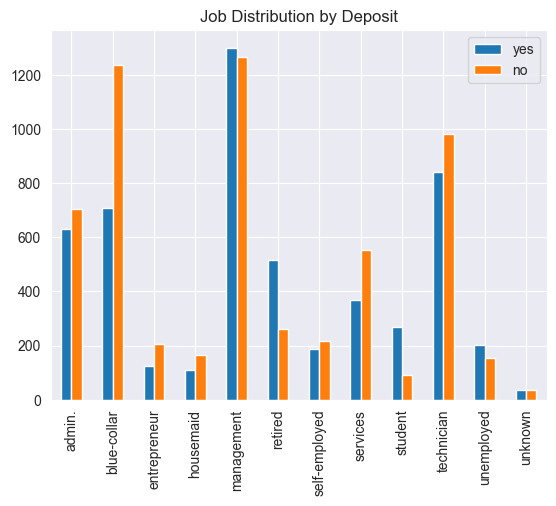

In [24]:
job_deposit_df = pd.DataFrame({
    'yes': df.loc[df['deposit'] == 'yes', 'job'].value_counts(),
    'no': df.loc[df['deposit'] == 'no', 'job'].value_counts()
})

job_deposit_df.plot.bar(title='Job Distribution by Deposit')

<Axes: title={'center': 'Marital Status Distribution by Deposit'}>

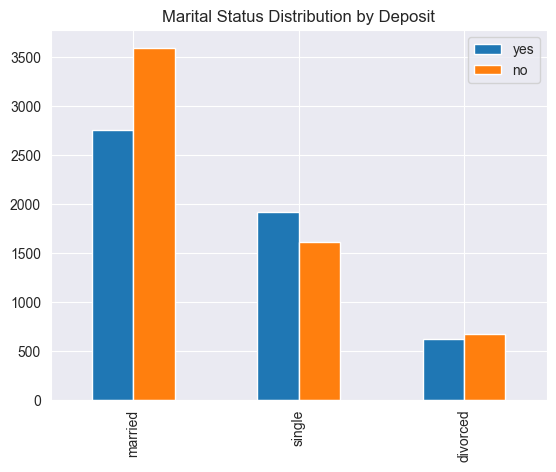

In [25]:
marital_deposit_df = pd.DataFrame({
    'yes': df.loc[df['deposit'] == 'yes', 'marital'].value_counts(),
    'no': df.loc[df['deposit'] == 'no', 'marital'].value_counts()
})

marital_deposit_df.plot.bar(title='Marital Status Distribution by Deposit')

<Axes: title={'center': 'Education Level Distribution by Deposit'}>

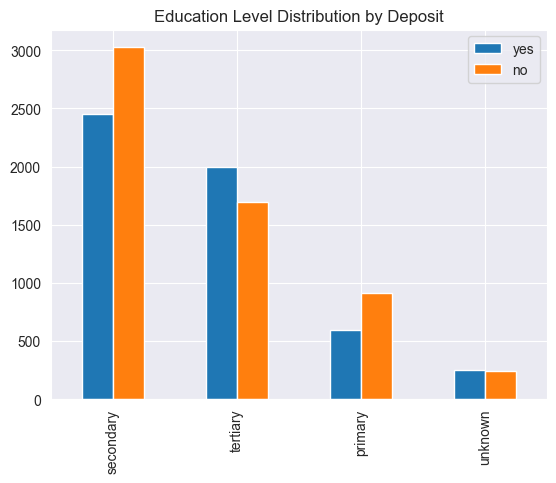

In [26]:
education_deposit_df = pd.DataFrame({
    'yes': df.loc[df['deposit'] == 'yes', 'education'].value_counts(),
    'no': df.loc[df['deposit'] == 'no', 'education'].value_counts()
})

education_deposit_df.plot.bar(title='Education Level Distribution by Deposit')

<Axes: title={'center': 'Type of Contact Distribution by Deposit'}>

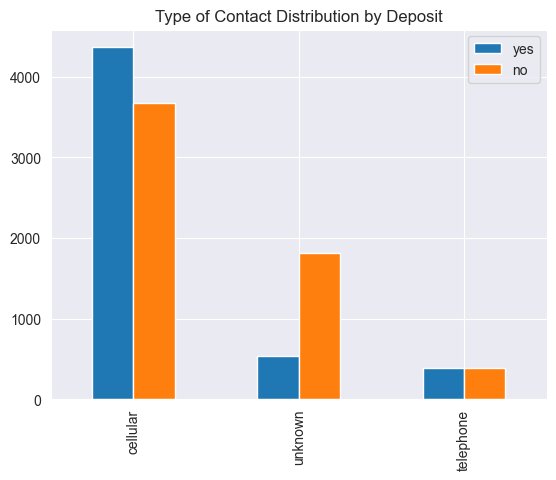

In [27]:
contact_deposit_df = pd.DataFrame({
    'yes': df.loc[df['deposit'] == 'yes', 'contact'].value_counts(),
    'no': df.loc[df['deposit'] == 'no', 'contact'].value_counts()
})

contact_deposit_df.plot.bar(title='Type of Contact Distribution by Deposit')

In [29]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


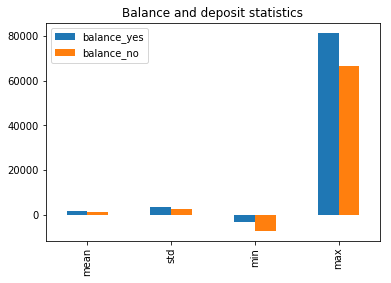

In [18]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [30]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


<Axes: title={'center': 'Age and deposit statistics'}>

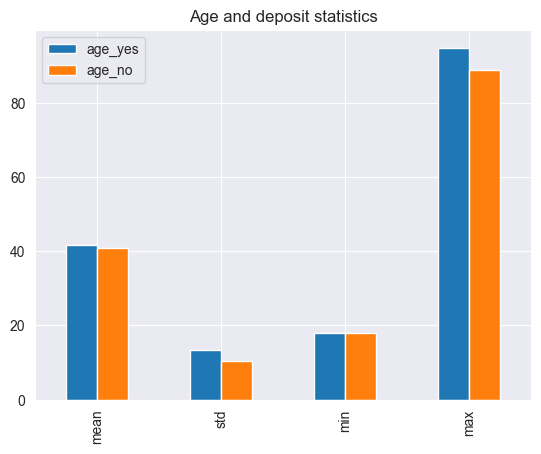

In [31]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [32]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<Axes: title={'center': 'Number of contacts performed during this campaign and deposit statistics'}>

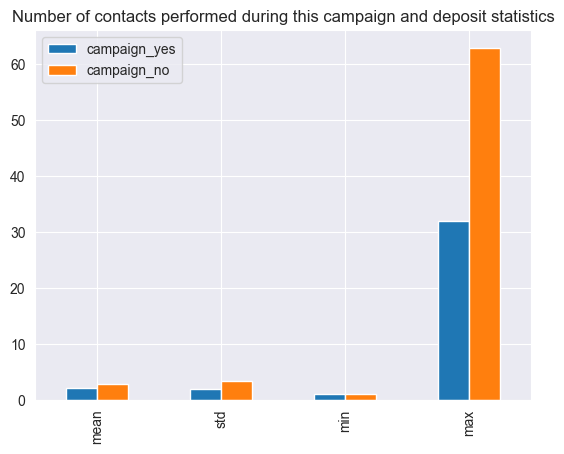

In [33]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [34]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


<Axes: title={'center': 'Number of contacts performed during previous campaign and deposit statistics'}>

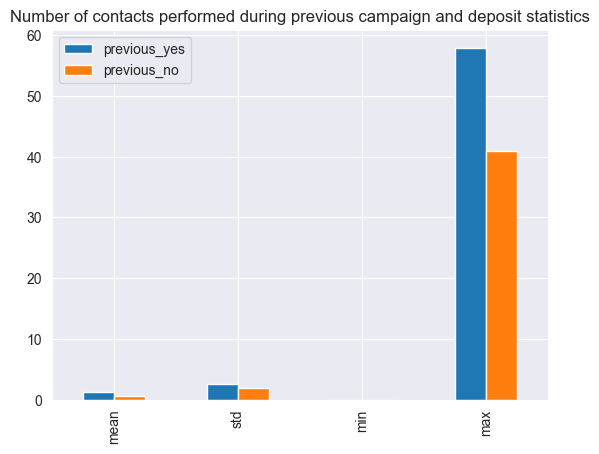

In [35]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

In [36]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''

    cleaned_df = df.copy()

    # Convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    cleaned_df = cleaned_df.assign(**{f"{col}_bool": (df[col] == 'yes').astype(int) for col in bool_columns})
    cleaned_df = cleaned_df.drop(columns=bool_columns)

    # Convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    cleaned_df = pd.get_dummies(cleaned_df, columns=cat_columns, prefix_sep='_', drop_first=True)

    # Drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns=['pdays'])

    # Impute incorrect values and drop original columns
    threshold = 34
    cleaned_df['campaign_cleaned'] = np.where(cleaned_df['campaign'] <= threshold, cleaned_df['campaign'], cleaned_df[cleaned_df['campaign'] <= threshold]['campaign'].mean())
    cleaned_df['previous_cleaned'] = np.where(cleaned_df['previous'] <= threshold, cleaned_df['previous'], cleaned_df[cleaned_df['previous'] <= threshold]['previous'].mean())
    cleaned_df = cleaned_df.drop(columns=['campaign', 'previous'])

    return cleaned_df

In [37]:
#clean the dataset
cleaned_df = clean_data(df)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
3,55,2476,5,579,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,54,184,5,673,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,2.0,0.0


MODEL DEVELOPMENT - ML MODELS FOR PRECTING CAMPAIGN RESULTS

In [38]:
from sklearn.model_selection import train_test_split

# Split data into features and target
X, y = cleaned_df.drop('deposit_bool', axis=1), cleaned_df['deposit_bool']

# Split data into training and testing sets
TEST_SIZE = 0.3
RAND_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RAND_STATE)

Train XGBoost classifier model:

In [43]:
import xgboost
from sklearn.metrics import accuracy_score

# Train XGBoost model
xgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.08,
    'gamma': 0,
    'subsample': 0.75,
    'colsample_bytree': 1,
    'max_depth': 7
}

xgb_model = xgboost.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f'XGB accuracy score: Train ->{train_accuracy:.3f}%, Test -> {test_accuracy:.3f}%')

XGB accuracy score: Train ->91.706%, Test -> 84.831%


Get the feature importances from the trained model:

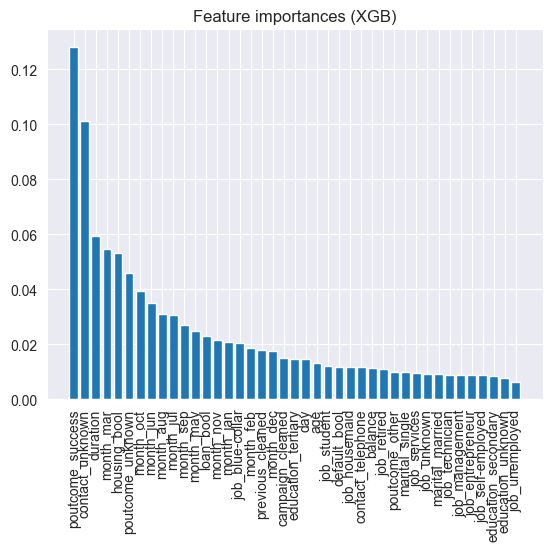

In [45]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

As we can see from the diagram showing feature importances, the most important features are:
* Customer's account balance,
* Customer's age,
* Number of contacts performed during this campaign and contact duration,
* Number of contacts performed before this campaign.

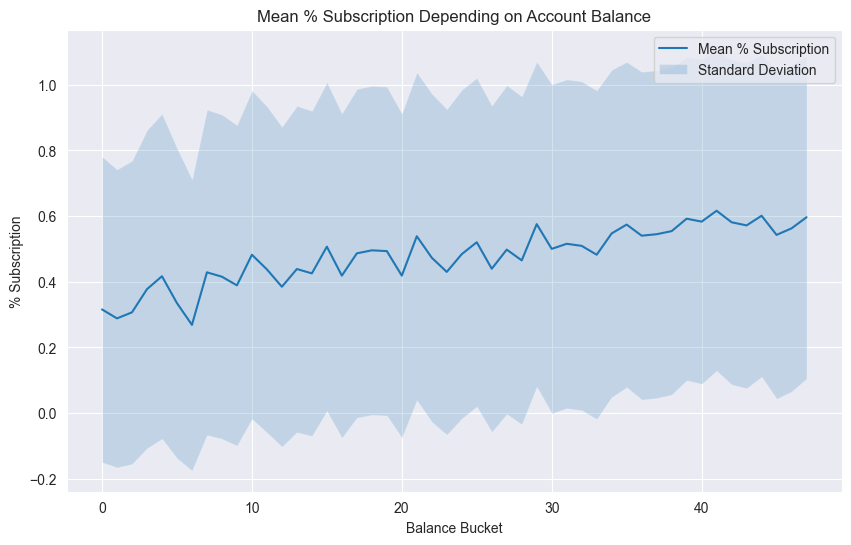

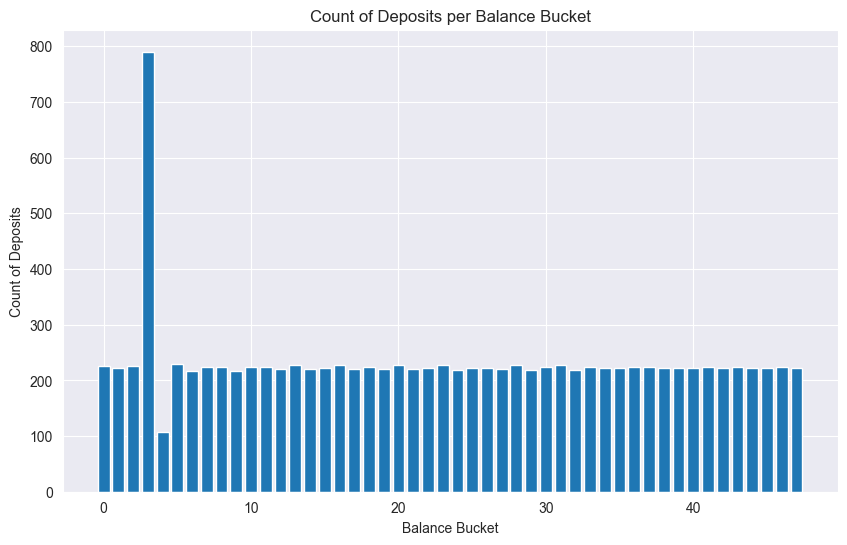

In [46]:

# Create a copy of the cleaned DataFrame
df_new = cleaned_df.copy()

# Introduce new column 'balance_buckets' to categorize balances into 50 buckets
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates='drop')

# Group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()

# Calculate additional measurements
std_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].std()
count_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].count()

# Plot mean % subscription depending on account balance
plt.figure(figsize=(10, 6))
plt.plot(mean_deposit.index, mean_deposit.values, label='Mean % Subscription')
plt.fill_between(mean_deposit.index, mean_deposit.values - std_deposit.values, mean_deposit.values + std_deposit.values, alpha=0.2, label='Standard Deviation')
plt.title('Mean % Subscription Depending on Account Balance')
plt.xlabel('Balance Bucket')
plt.ylabel('% Subscription')
plt.legend()
plt.show()

# Plot count of deposits per balance bucket
plt.figure(figsize=(10, 6))
plt.bar(mean_deposit.index, count_deposit.values)
plt.title('Count of Deposits per Balance Bucket')
plt.xlabel('Balance Bucket')
plt.ylabel('Count of Deposits')
plt.show()

In [47]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1490

"Based on the analysis, it is recommended that marketing campaigns focus on targeting customers with an account balance exceeding $1490, as this segment exhibits a higher likelihood of subscription and deposit activity."

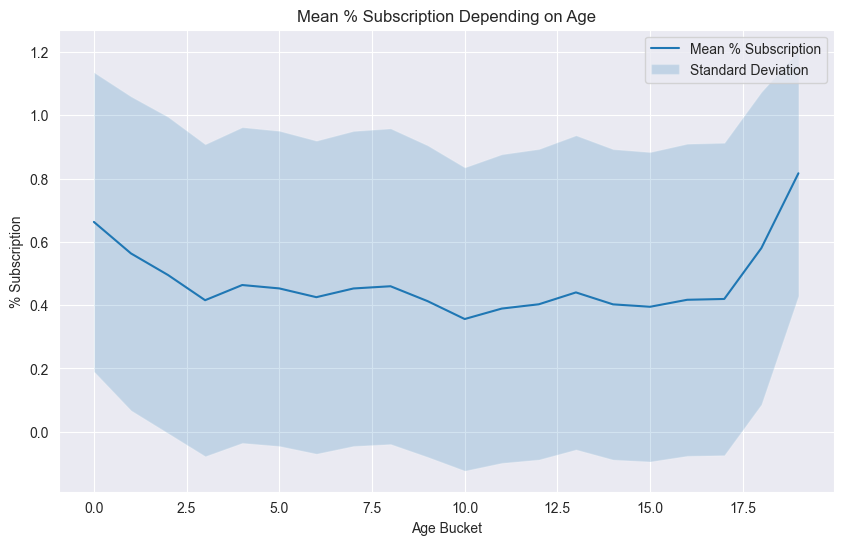

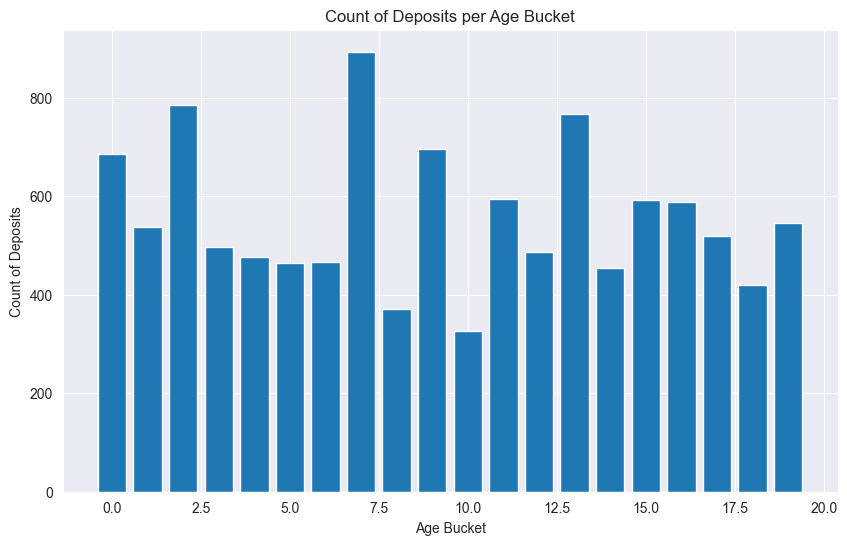

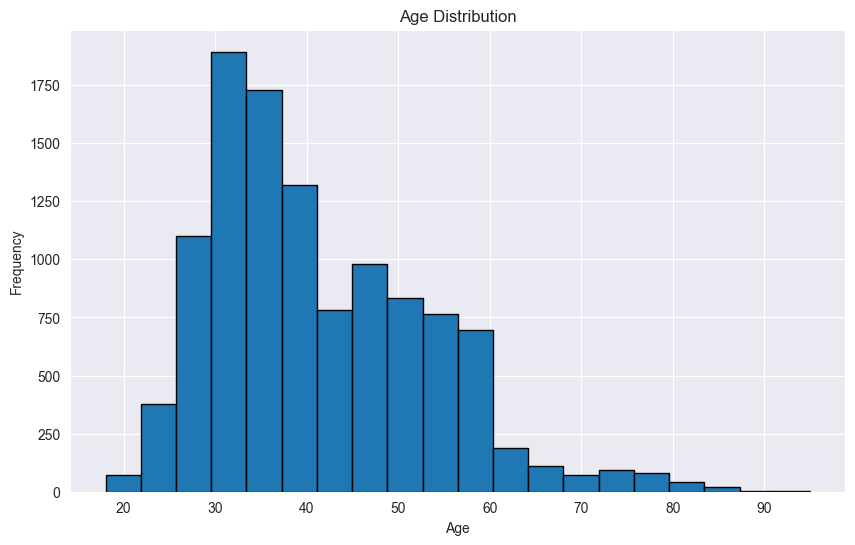

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the cleaned DataFrame
df_new = cleaned_df.copy()

# Introduce new column 'age_buckets' to categorize ages into 20 buckets
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates='drop')

# Group by 'age_buckets' and find average campaign outcome per age bucket
mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()

# Calculate additional measurements
std_age = df_new.groupby(['age_buckets'])['deposit_bool'].std()
count_age = df_new.groupby(['age_buckets'])['deposit_bool'].count()

# Plot mean % subscription depending on age
plt.figure(figsize=(10, 6))
plt.plot(mean_age.index, mean_age.values, label='Mean % Subscription')
plt.fill_between(mean_age.index, mean_age.values - std_age.values, mean_age.values + std_age.values, alpha=0.2, label='Standard Deviation')
plt.title('Mean % Subscription Depending on Age')
plt.xlabel('Age Bucket')
plt.ylabel('% Subscription')
plt.legend()
plt.show()

# Plot count of deposits per age bucket
plt.figure(figsize=(10, 6))
plt.bar(mean_age.index, count_age.values)
plt.title('Count of Deposits per Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('Count of Deposits')
plt.show()

# Plot age distribution
plt.figure(figsize=(10, 6))
plt.hist(df_new['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [49]:
df_new[df_new['age_buckets'] == 3]['age'].max()

31

In [50]:
df_new[df_new['age_buckets'] == 17]['age'].min()

56

"Notably, the data suggests that customers at the extremes of the age spectrum, specifically those under 31 years old and those above 56 years old, tend to exhibit higher average subscription rates compared to other age groups."

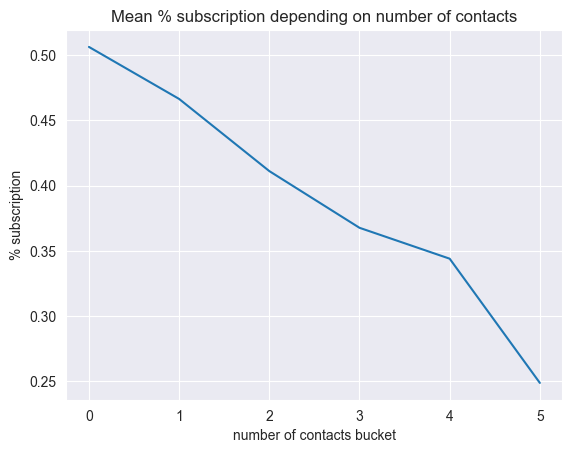

In [51]:
#introduce new column 'age_buckets' to  ''
df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_campaign = df_new.groupby(['campaign_buckets'])['deposit_bool'].mean()

#plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('Mean % subscription depending on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('% subscription')
plt.show()

In [52]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0

From the plot above we see that average subscription rate is below 50% if the number of contacts during the campaign exceeds 4.

## Conclusion

"The analysis yields three key takeaways for informing future marketing campaigns:

Firstly, account balance emerges as a significant predictor of campaign success, with customers holding balances above $1490 being more likely to subscribe to term deposits. Therefore, future campaigns should prioritize targeting this demographic.

Secondly, age is a crucial factor, with customers under 30 and over 50 years old exhibiting higher subscription rates. Marketing efforts should focus on these age categories to maximize campaign effectiveness.

Lastly, the number of customer contacts during the campaign is critical, with an optimal threshold of four contacts. Exceeding this limit may lead to diminishing returns, and campaigns should be designed to strike a balance between engagement and over-solicitation."